In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
def clean_csv_data(filename, path='./test_data/'):
    # 从csv读取数据, 加入head行, 去掉最后一行“通达信”
    stk = pd.read_csv(path+filename, names=['date', 'open', 'high', 'low', 'close', 'amount', 'volume'], parse_dates=True)
    stk = stk.drop(stk.index[-1])
    # 计算涨幅
    stk['rise'] = stk['close'] / stk['close'].shift(1) - 1
    # 剔除涨幅超过+-%10.1的数据
    index_names = stk[ (stk['rise'] > 0.101) & (stk['rise'] < -0.101)].index 
    stk.drop(index_names, inplace = True) 
    # 去除含NaN的行
    stk.dropna(axis=0, inplace=True)
    # 可以只保留日期,收盘价,涨幅用于构建神经网络
    cols_to_keep = ['date','close','rise']
    stk = stk[cols_to_keep]
    #stk = stk.set_index('date')
    #stk.to_csv(path+'cleaned'+filename)
    return stk

In [4]:
stk = clean_csv_data('600000.csv')
stk

,date,close,rise
1,20200221,10.70,0.006585
2,20200224,10.56,-0.013084
3,20200225,10.49,-0.006629
4,20200226,10.60,0.010486
5,20200227,10.61,0.000943
...,...,...,...
249,20210301,10.58,0.003795
250,20210302,10.47,-0.010397
251,20210303,10.92,0.042980
252,20210304,10.88,-0.003663


<IPython.core.display.Javascript object>


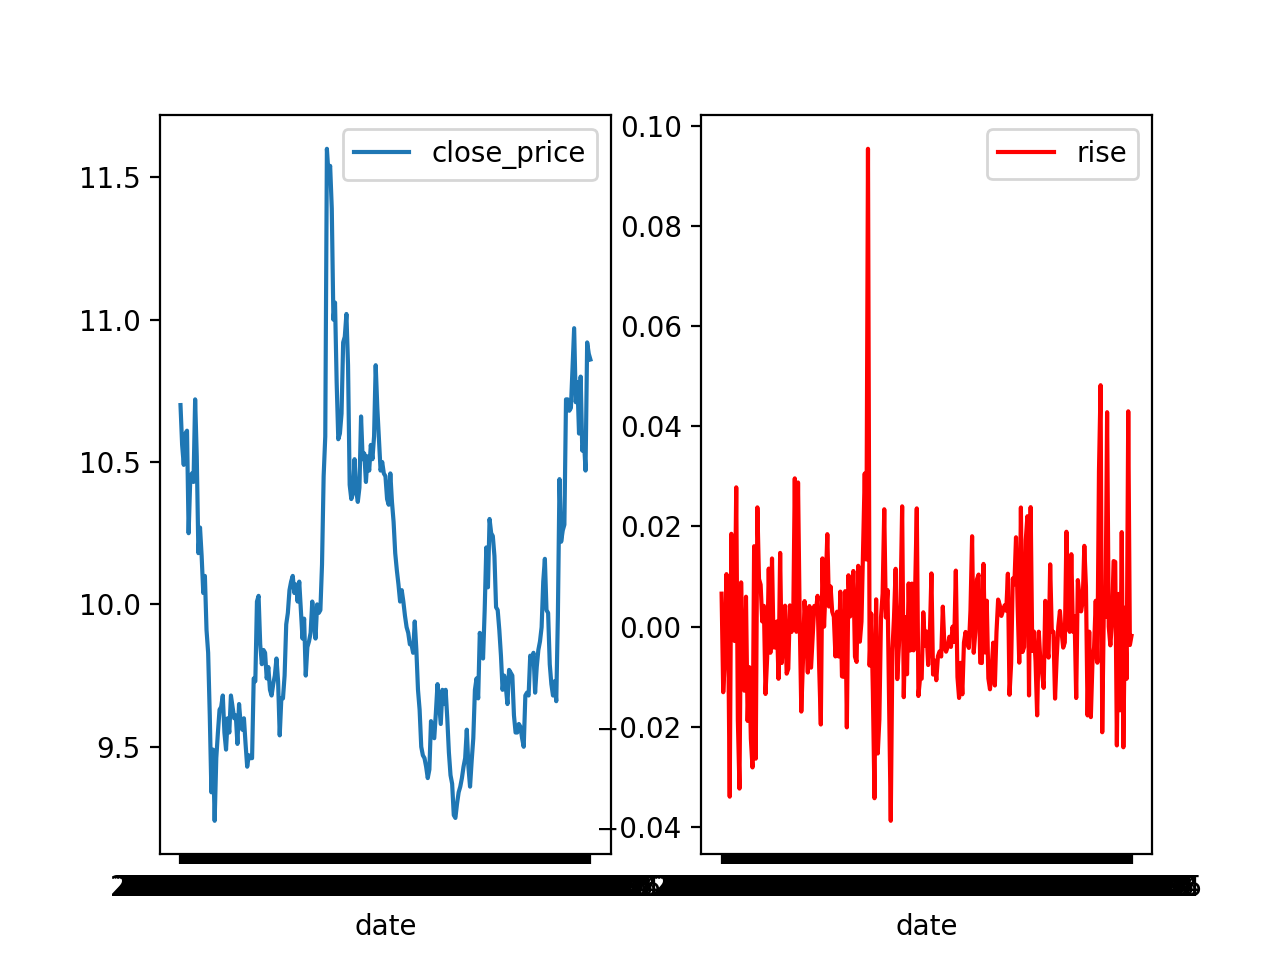

In [5]:
# 收盘价和涨幅图像

plt.subplot(1,2,1)
plt.plot(stk['date'], stk['close'], label='close_price')
plt.xlabel('date')
plt.legend()
plt.subplot(1,2,2)
plt.plot(stk['date'], stk['rise'], color='red', label='rise')
plt.xlabel('date')
plt.legend()

plt.show()
plt.savefig('Cleaned_600000.png')